In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.xception import Xception
from keras.applications.resnet50 import ResNet50
from keras.applications.densenet import DenseNet121
from keras.layers import Input, Flatten, Dense, Dropout
from keras.regularizers import l2
import matplotlib.pyplot as plt

In [ ]:
from keras import backend as K
K.clear_session()

In [ ]:
!unzip /content/drive/MyDrive/weather_prediction/Medicinalplantdataset.zip

In [ ]:
dataset = '/content/Medicinal plant dataset'

In [ ]:
data_gen = ImageDataGenerator(rescale=1./255, rotation_range=180, brightness_range=[0.2, 1.0], horizontal_flip=True,validation_split=0.2)

In [ ]:
train_imgs = data_gen.flow_from_directory(dataset, target_size=(224,224),class_mode='categorical', subset='training', shuffle=True)
test_imgs = data_gen.flow_from_directory(dataset, target_size=(224,224),class_mode='categorical', subset='validation', shuffle=True)

Found 4765 images belonging to 40 classes.
Found 1180 images belonging to 40 classes.


In [ ]:
input = Input(shape=(224, 224, 3))
model = DenseNet121(include_top=False, weights='imagenet', input_tensor=input)
model.trainable=True
# for layers in model.layers[-1:-5:-1]:
#   layers.trainable=True

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
# output = model.output
# x = Flatten()(output)
# x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)
# x = Dropout(0.2)(x)
# x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)
# x = Dropout(0.2)(x)
# x = Dense(40, activation='softmax')(x)

output = model.output
x = Flatten()(output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(40, activation='softmax')(x)

In [ ]:
model = keras.Model(inputs=input, outputs=x)

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('best_model_.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
callbacks = [checkpoint]


optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.09)

model.compile(loss=tensorflow.keras.losses.CategoricalCrossentropy(), optimizer=optimizer, metrics=['accuracy'])

history = model.fit(train_imgs, epochs=10,
                    validation_data=test_imgs,
                    callbacks=callbacks
                    )

Epoch 1/10
149/149 [==============================] - ETA: 0s - loss: 2.6443 - accuracy: 0.3977
Epoch 1: val_accuracy improved from -inf to 0.48305, saving model to best_model_.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


149/149 [==============================] - 177s 889ms/step - loss: 2.6443 - accuracy: 0.3977 - val_loss: 1.9115 - val_accuracy: 0.4831
Epoch 2/10
149/149 [==============================] - ETA: 0s - loss: 0.5262 - accuracy: 0.8342
Epoch 2: val_accuracy improved from 0.48305 to 0.84237, saving model to best_model_.h5
149/149 [==============================] - 114s 765ms/step - loss: 0.5262 - accuracy: 0.8342 - val_loss: 0.5554 - val_accuracy: 0.8424
Epoch 3/10
149/149 [==============================] - ETA: 0s - loss: 0.2590 - accuracy: 0.9192
Epoch 3: val_accuracy improved from 0.84237 to 0.89237, saving model to best_model_.h5
149/149 [==============================] - 112s 751ms/step - loss: 0.2590 - accuracy: 0.9192 - val_loss: 0.3234 - val_accuracy: 0.8924
Epoch 4/10
149/149 [==============================] - ETA: 0s - loss: 0.1735 - accuracy: 0.9423
Epoch 4: val_accuracy improved from 0.89237 to 0.90169, saving model to best_model_.h5
149/149 [==============================] - 114

In [ ]:
densenet121 = keras.models.load_model('/content/best_model_.h5')
densenet121.save('/content/drive/MyDrive/weather_prediction/densenet121_new.h5')

In [ ]:
10+10                                                                                                                                                                                                                                                                            `history

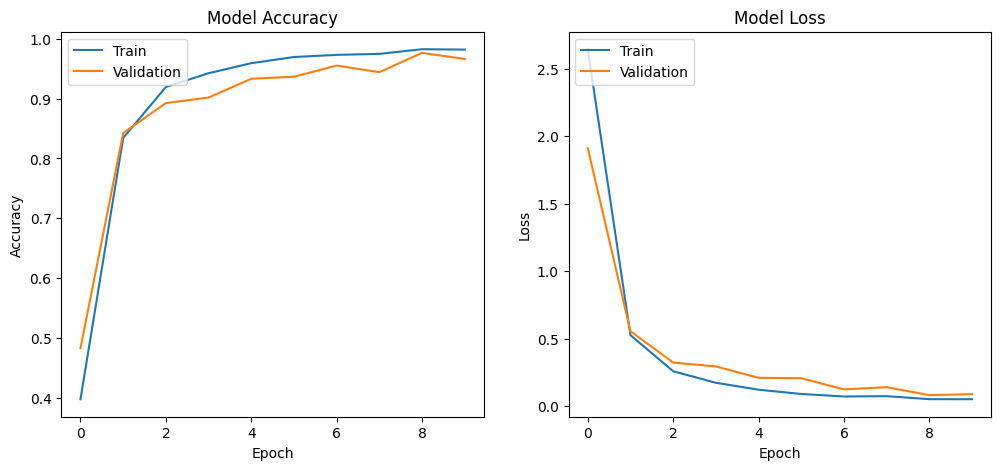

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [ ]:
model.save('/content/drive/MyDrive/Extras/Plants_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
